In [4]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


In [7]:
image_x, image_y = 200, 200
batch_size = 64
train_dir = "E:\hand_gesture_E_chart\gestures"



In [8]:
def keras_model(image_x, image_y):
    num_of_classes = 4
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x, image_y, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "emojinator_v3.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [10]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

Found 3840 images belonging to 4 classes.
Found 960 images belonging to 4 classes.





C:\Users\user\AppData\Local\Temp\ipykernel_21860\494586767.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


60/60 [==============================] - 146s 2s/step - loss: 0.5590 - accuracy: 0.8047 - val_loss: 0.2433 - val_accuracy: 0.9333
Epoch 2/10
60/60 [==============================] - 101s 2s/step - loss: 0.0709 - accuracy: 0.9779 - val_loss: 0.1092 - val_accuracy: 0.9656
Epoch 3/10
60/60 [==============================] - 96s 2s/step - loss: 0.0364 - accuracy: 0.9872 - val_loss: 0.1601 - val_accuracy: 0.9615
Epoch 4/10
60/60 [==============================] - 98s 2s/step - loss: 0.0311 - accuracy: 0.9888 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 5/10
60/60 [==============================] - 92s 2s/step - loss: 0.0167 - accuracy: 0.9937 - val_loss: 0.0485 - val_accuracy: 0.9844
Epoch 6/10
60/60 [==============================] - 95s 2s/step - loss: 0.0127 - accuracy: 0.9948 - val_loss: 0.0736 - val_accuracy: 0.9781
Epoch 7/10
60/60 [==============================] - 96s 2s/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0638 - val_accuracy: 0.9802
Epoch 8/10
60/60

C:\Users\user\AppData\Local\Temp\ipykernel_21860\494586767.py:35: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, len(validation_generator))


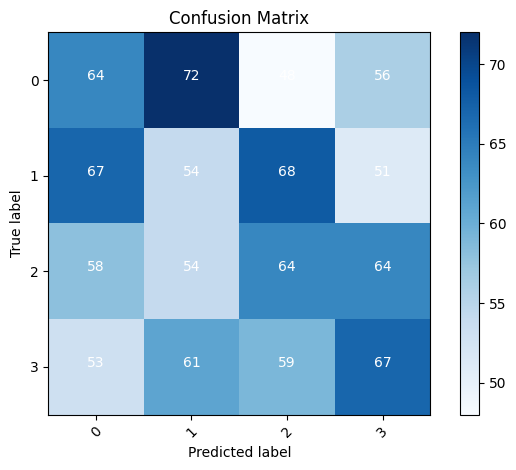

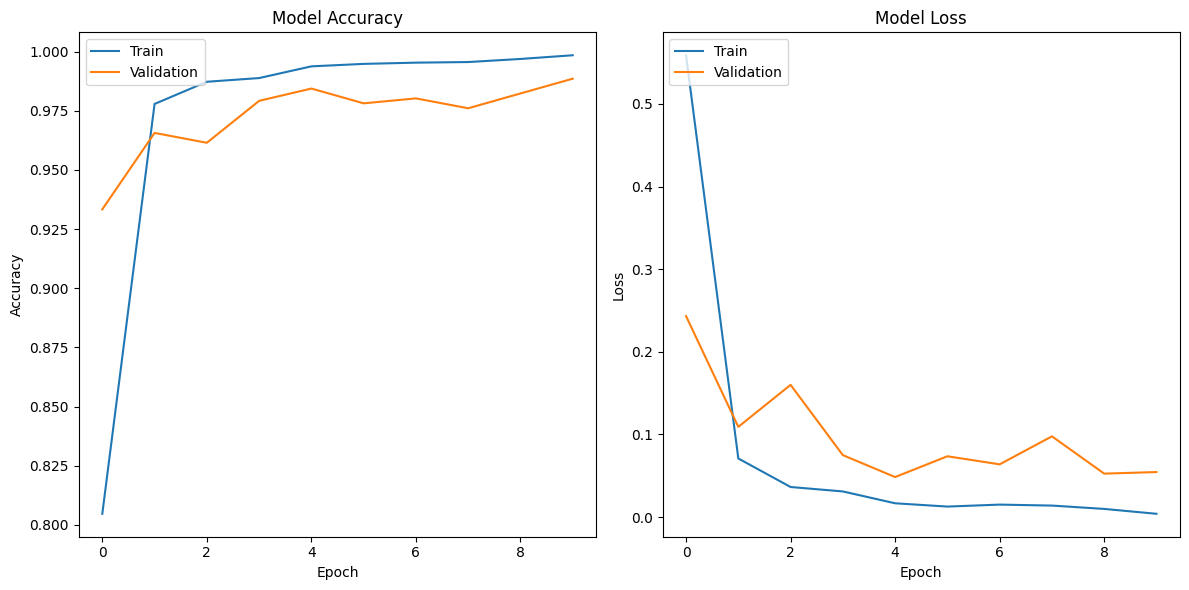

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:

def main():
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #shear_range=0.2,
        #rotation_range=15,
        zoom_range=0.2,
        #horizontal_flip=True,
        validation_split=0.2,
        fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_x, image_y),
        color_mode="grayscale",
        batch_size=batch_size,
        seed=42,
        class_mode='categorical',
        subset="training")

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_x, image_y),
        color_mode="grayscale",
        batch_size=batch_size,
        seed=42,
        class_mode='categorical',
        subset="validation")

    model, callbacks_list = keras_model(image_x, image_y)
    history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

    # Plot confusion matrix
    Y_pred = model.predict_generator(validation_generator, len(validation_generator))
    y_pred = np.argmax(Y_pred, axis=1)
    plot_confusion_matrix(validation_generator.classes, y_pred, classes=train_generator.class_indices.keys())

    # Plot accuracy and loss graphs
    plot_history(history)

    # Save the model
    model.save('emojinator_v3.h5')

main()